In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import drive

drive.mount('/content/gdrive')
directory= '/content/gdrive/MyDrive/survey lung cancer.csv'
df = pd.read_csv(directory)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.colums = ["GENDER","LUNG_CANCER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","WHEEZING","ALCOHOL CONSUMING",
             "COUGHING","SHORTNESS OF BREATH","SWALLOWING DIFFICULTY","CHEST PAIN"]

<ipython-input-3-e0f9108f9b32>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = ["GENDER","LUNG_CANCER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","WHEEZING","ALCOHOL CONSUMING",


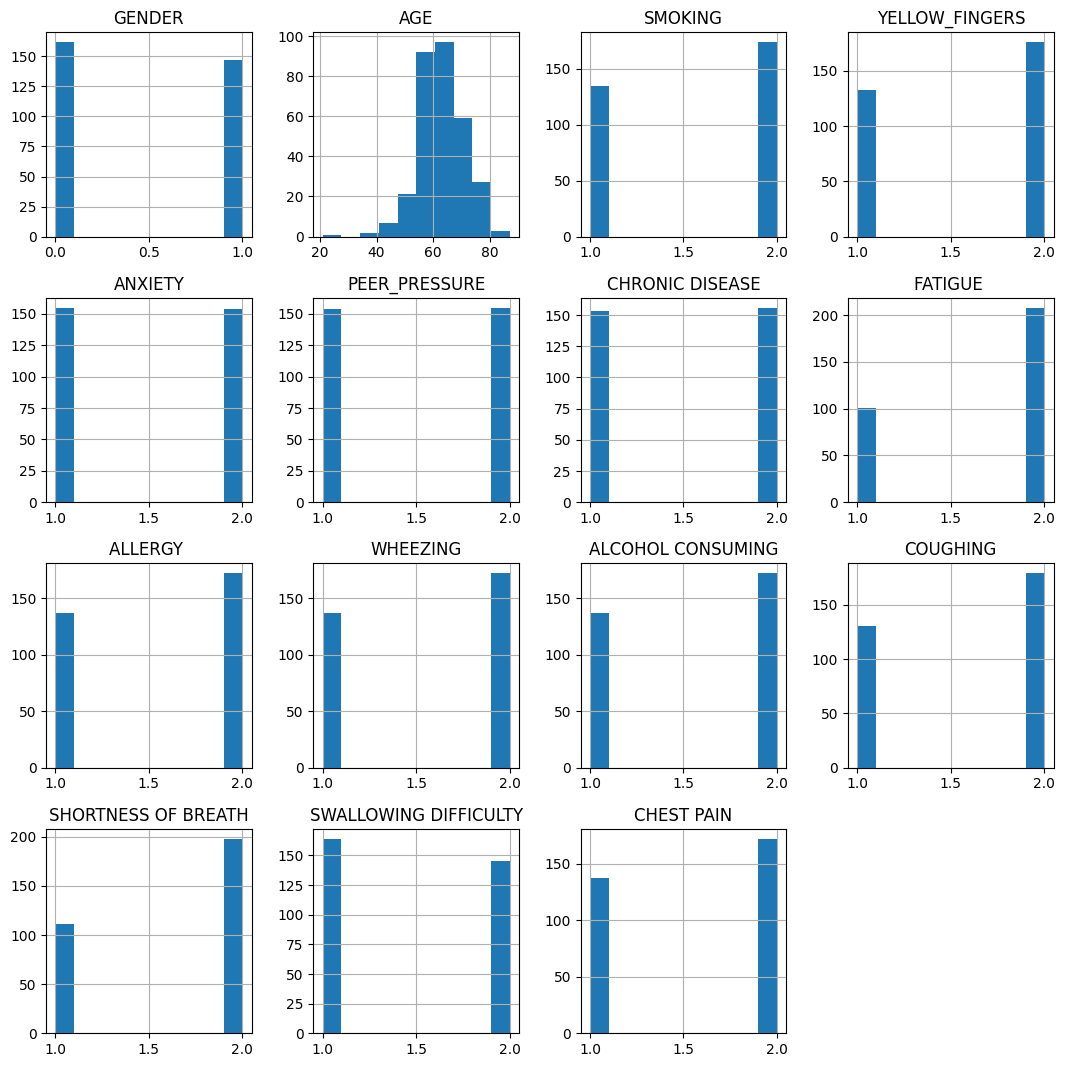

In [10]:
import matplotlib.pyplot as plt

df.hist(figsize = (13,13))
plt.show()

In [5]:
df["GENDER"].replace(["M","F"], [0,1], inplace=True)

In [6]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
x = df[["GENDER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","WHEEZING","ALCOHOL CONSUMING","COUGHING","SHORTNESS OF BREATH",
        "SWALLOWING DIFFICULTY","CHEST PAIN"]]

y = df["LUNG_CANCER"]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=142)

print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (216, 13)
Number transactions y_train dataset:  (216,)
Number transactions x_test dataset:  (93, 13)
Number transactions y_test dataset:  (93,)


In [9]:
dt = DecisionTreeClassifier(max_depth=6,random_state=1)

dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8602150537634409
